# Figure: Emergent Connectivity Structure

## Set up

In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
# jupyter black formatter
%load_ext jupyter_black

import subprocess
import os
import sys

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "pirnns"))
print("Working directory: ", os.getcwd())

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)
sys.path.append(os.getcwd())
print("Directory added to path: ", os.getcwd())

Working directory:  /home/facosta/pirnns/pirnns
Directory added to path:  /home/facosta/pirnns
Directory added to path:  /home/facosta/pirnns/pirnns


## Load trained models

In [3]:
from pirnns.paper_figs.load_models import load_experiment_sweep
import torch


sweep_dir = (
    "/home/facosta/pirnns/pirnns/logs/experiments/timescales_sweep_20250919_130449"
)

device = "cuda" if torch.cuda.is_available() else "cpu"

models, metadata, summary = load_experiment_sweep(
    sweep_dir=sweep_dir,
    device=device,
    use_lightning_checkpoint=True,
    checkpoint_type="best",
)

Loading 8 experiments with 5 seeds each...
Total models to load: 40
Using Lightning checkpoints

Loading experiment: discrete_single_025
  ✓ Loaded discrete_single_025/seed_0
  ✓ Loaded discrete_single_025/seed_1
  ✓ Loaded discrete_single_025/seed_2
  ✓ Loaded discrete_single_025/seed_3
  ✓ Loaded discrete_single_025/seed_4
Loading experiment: discrete_single_05
  ✓ Loaded discrete_single_05/seed_0
  ✓ Loaded discrete_single_05/seed_1
  ✓ Loaded discrete_single_05/seed_2
  ✓ Loaded discrete_single_05/seed_3
  ✓ Loaded discrete_single_05/seed_4
Loading experiment: discrete_single_075
  ✓ Loaded discrete_single_075/seed_0
  ✓ Loaded discrete_single_075/seed_1
  ✓ Loaded discrete_single_075/seed_2
  ✓ Loaded discrete_single_075/seed_3
  ✓ Loaded discrete_single_075/seed_4
Loading experiment: discrete_single_1
  ✓ Loaded discrete_single_1/seed_0
  ✓ Loaded discrete_single_1/seed_1
  ✓ Loaded discrete_single_1/seed_2
  ✓ Loaded discrete_single_1/seed_3
  ✓ Loaded discrete_single_1/seed_4
L

## Show connection weight distributions by group pairs

Found 4 discrete timescale groups:
  Group 0: τ=0.0001, 1016 neurons (24.8%)
  Group 1: τ=0.0721, 1041 neurons (25.4%)
  Group 2: τ=0.1443, 1001 neurons (24.4%)
  Group 3: τ=0.3476, 1038 neurons (25.3%)
Global weight statistics:
  Mean: -0.000091
  Std: 0.002806
  Range: [-0.106838, 0.108876]
  Max group std: 0.007487
  Common x-limits: [-0.022462, 0.022462]
  Total connections: 16,777,216


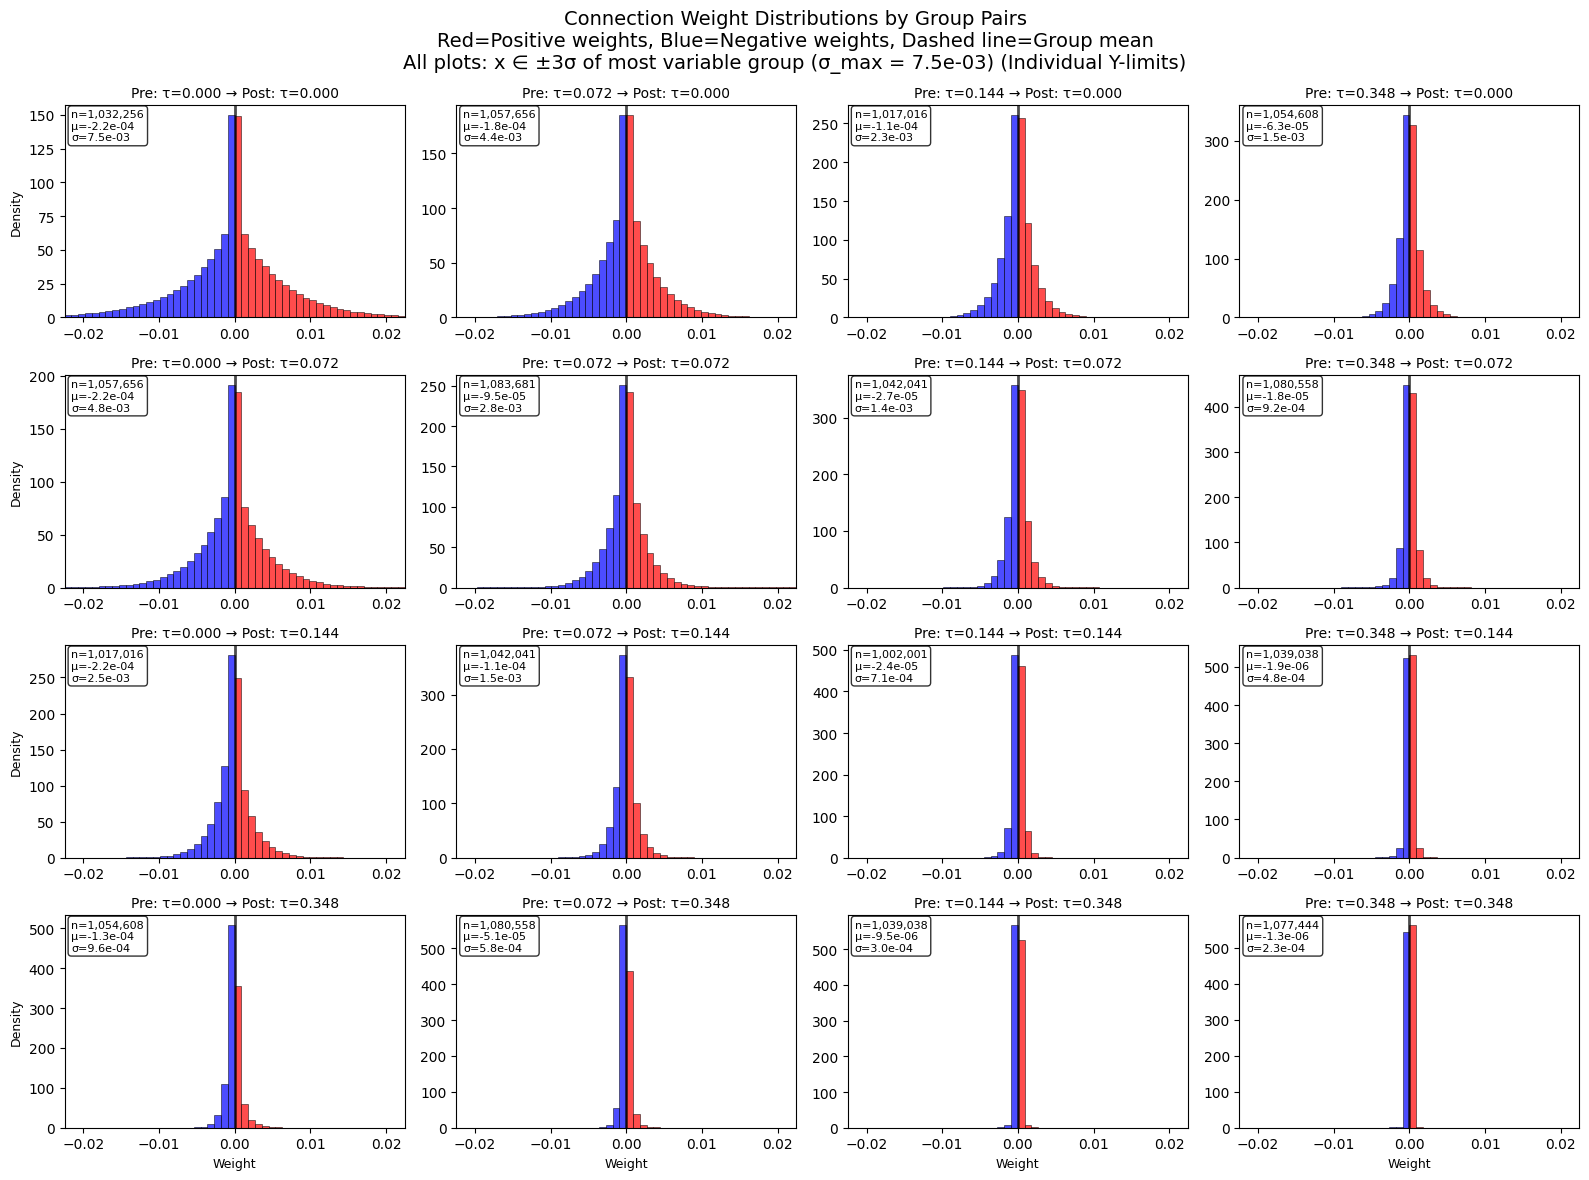

In [100]:
from pirnns.paper_figs.connectivity.connectivity import get_timescale_groups
import matplotlib.pyplot as plt

from pirnns.paper_figs.connectivity.connectivity import (
    plot_group_connectivity_distributions,
)


model_type = "discrete_four"
seed = 0
model = models[model_type][seed]["model"]
W_rec, timescales, unique_timescales, group_assignment = get_timescale_groups(model)

fig, group_weights = plot_group_connectivity_distributions(
    W_rec,
    group_assignment,
    unique_timescales,
    figsize=(16, 12),
    bins=50,
    common_ylim=False,
    paper_ready=False,
    save_fig=False,
    save_fig_name=f"paper_figs/connectivity/weight_distributions_{model_type}_{seed}.pdf",
)
plt.show()

## Show bipartite graph with line thickness = mean absolute weight

Binned 4096 neurons into 10 groups:
Timescale range: [0.0434, 0.8989]
  Group 0: τ_mean=0.0505, range=[0.0434, 0.0588], 736 neurons (18.0%)
  Group 1: τ_mean=0.0684, range=[0.0588, 0.0796], 639 neurons (15.6%)
  Group 2: τ_mean=0.0923, range=[0.0796, 0.1077], 522 neurons (12.7%)
  Group 3: τ_mean=0.1249, range=[0.1077, 0.1459], 497 neurons (12.1%)
  Group 4: τ_mean=0.1709, range=[0.1459, 0.1975], 401 neurons (9.8%)
  Group 5: τ_mean=0.2286, range=[0.1975, 0.2675], 321 neurons (7.8%)
  Group 6: τ_mean=0.3139, range=[0.2675, 0.3621], 317 neurons (7.7%)
  Group 7: τ_mean=0.4211, range=[0.3621, 0.4903], 254 neurons (6.2%)
  Group 8: τ_mean=0.5709, range=[0.4903, 0.6639], 233 neurons (5.7%)
  Group 9: τ_mean=0.7782, range=[0.6639, 0.8989], 176 neurons (4.3%)
Connection magnitude range: [5.2e-05, 5.2e-03]

Connection Summary (by magnitude):
G1 → G1: |W|=5.2e-03 (541696 connections)
G1 → G2: |W|=4.3e-03 (470304 connections)
G2 → G1: |W|=4.2e-03 (470304 connections)
G2 → G2: |W|=3.5e-03 (40832

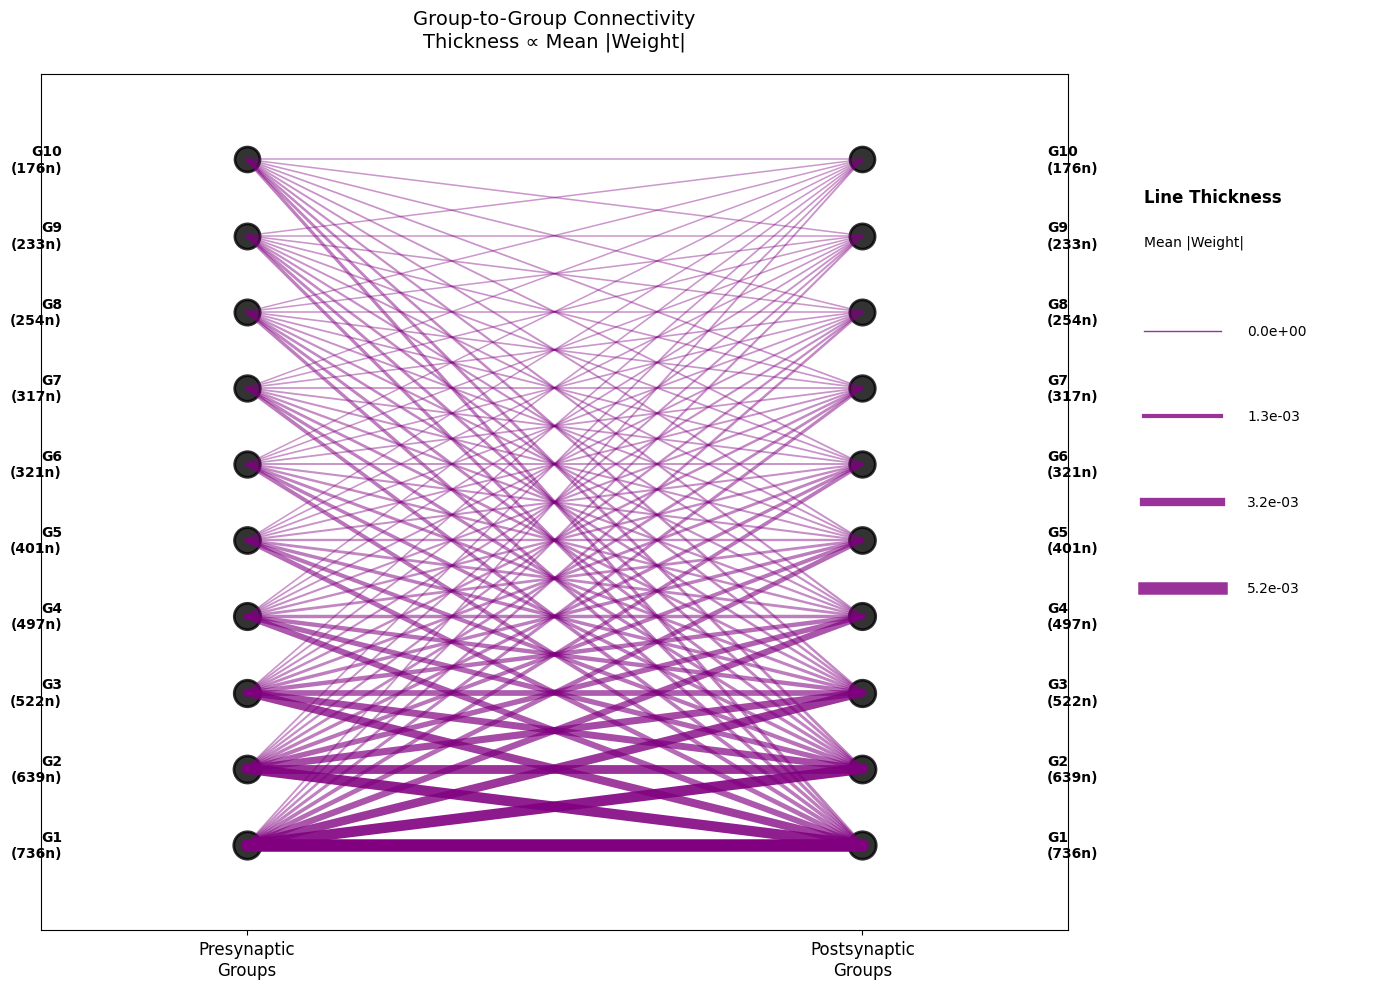

In [89]:
from pirnns.paper_figs.connectivity.connectivity import (
    plot_group_bipartite_with_asymmetry,
)

model_type = "continuous_powerlaw_15"
seed = 0
model = models[model_type][seed]["model"]
W_rec, timescales, unique_timescales, group_assignment = get_timescale_groups(
    model,
    group_method="binned",
    n_groups=10,
)

fig, group_stats, connection_info = plot_group_bipartite_with_asymmetry(
    W_rec,
    group_assignment,
    unique_timescales,
    timescales,
    figsize=(14, 10),
    save_fig=True,
    save_fig_name=f"paper_figs/connectivity/group_bipartite_{model_type}_{seed}.pdf",
)
plt.show()

### Histograms: Self-connection, avg incoming, avg outgoing

Binned 4096 neurons into 10 groups:
Timescale range: [0.0434, 0.8989]
  Group 0: τ_mean=0.0505, range=[0.0434, 0.0588], 736 neurons (18.0%)
  Group 1: τ_mean=0.0684, range=[0.0588, 0.0796], 639 neurons (15.6%)
  Group 2: τ_mean=0.0923, range=[0.0796, 0.1077], 522 neurons (12.7%)
  Group 3: τ_mean=0.1249, range=[0.1077, 0.1459], 497 neurons (12.1%)
  Group 4: τ_mean=0.1709, range=[0.1459, 0.1975], 401 neurons (9.8%)
  Group 5: τ_mean=0.2286, range=[0.1975, 0.2675], 321 neurons (7.8%)
  Group 6: τ_mean=0.3139, range=[0.2675, 0.3621], 317 neurons (7.7%)
  Group 7: τ_mean=0.4211, range=[0.3621, 0.4903], 254 neurons (6.2%)
  Group 8: τ_mean=0.5709, range=[0.4903, 0.6639], 233 neurons (5.7%)
  Group 9: τ_mean=0.7782, range=[0.6639, 0.8989], 176 neurons (4.3%)
Magnitude-based connectivity statistics:

Self-connections |magnitude|:
  Group 0 (τ=0.0505): 0.005174
  Group 1 (τ=0.0684): 0.003464
  Group 2 (τ=0.0923): 0.002015
  Group 3 (τ=0.1249): 0.000957
  Group 4 (τ=0.1709): 0.000447
  Group 5

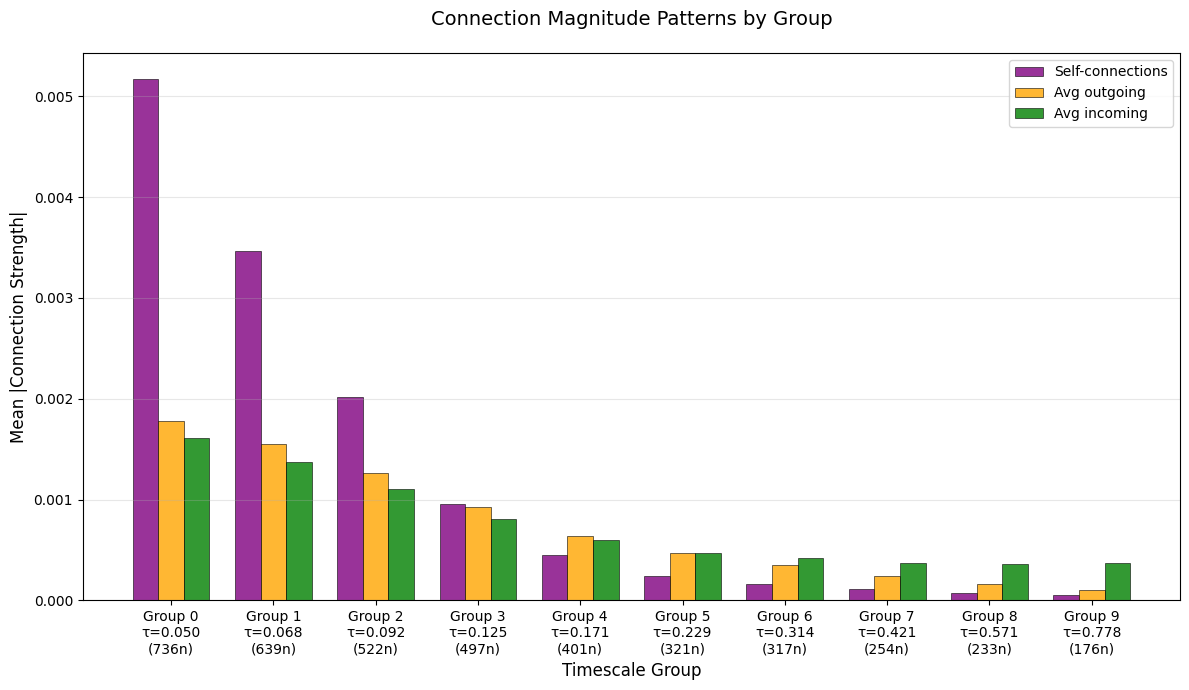

In [84]:
from pirnns.paper_figs.connectivity.connectivity import (
    plot_group_connectivity_magnitude_stats,
)

model_type = "continuous_powerlaw_15"
seed = 0
model = models[model_type][seed]["model"]
W_rec, timescales, unique_timescales, group_assignment = get_timescale_groups(
    model,
    group_method="binned",
    n_groups=10,
)

fig, stats = plot_group_connectivity_magnitude_stats(
    W_rec,
    group_assignment,
    unique_timescales,
    figsize=(12, 7),
    save_fig=True,
    save_fig_name=f"paper_figs/connectivity/histograms_{model_type}_{seed}.pdf",
)
plt.show()

### Visualize timescales for overview figure

In [96]:
import matplotlib.pyplot as plt
import numpy as np


def plot_timescale_distributions(models, figsize=(12, 8), seed=0, log_scale=False):
    """Plot timescale distributions in organized 2x3 grid."""

    # Define experiments for each row
    discrete_exps = ["discrete_single_1", "discrete_two", "discrete_four"]
    continuous_exps = ["continuous_powerlaw_15", "continuous_powerlaw_20"]

    # Create 2x3 subplot grid
    fig, axes = plt.subplots(2, 3, figsize=figsize)

    # Color palettes for each row
    discrete_colors = plt.cm.Blues(np.linspace(0.4, 0.8, 3))
    continuous_colors = plt.cm.Reds(np.linspace(0.4, 0.8, 2))

    # First, collect all discrete timescales to get consistent limits and bar width
    all_discrete_vals = []
    for exp_name in discrete_exps:
        if exp_name in models:
            model = models[exp_name][seed]["model"]
            timescales = model.rnn_step.timescales.cpu().numpy()
            unique_vals = np.unique(timescales)
            all_discrete_vals.extend(unique_vals)

    all_discrete_vals = np.unique(all_discrete_vals)
    if len(all_discrete_vals) > 1:
        bar_width = 0.6 * np.min(np.diff(np.sort(all_discrete_vals)))
    else:
        bar_width = 0.01

    x_min = all_discrete_vals.min() - bar_width * 2
    x_max = all_discrete_vals.max() + bar_width * 2

    # Top row: discrete experiments
    for i, exp_name in enumerate(discrete_exps):
        ax = axes[0, i]

        if exp_name in models:
            model = models[exp_name][seed]["model"]
            timescales = model.rnn_step.timescales.cpu().numpy()

            vals, counts = np.unique(timescales, return_counts=True)
            bars = ax.bar(
                vals,
                counts,
                width=bar_width,
                color=discrete_colors[i],
                alpha=0.8,
                edgecolor="black",
                linewidth=1,
            )

            # Consistent x-limits for all discrete plots
            ax.set_xlim(x_min, x_max)

        ax.set_xlabel("Timescale (τ)", fontsize=11)
        ax.set_ylabel("Count", fontsize=11)
        ax.set_title(exp_name.replace("_", " ").title(), fontsize=12, pad=8)
        ax.grid(True, alpha=0.2, linewidth=0.5)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.margins(y=0.02)

    # Bottom row: continuous experiments
    for i, exp_name in enumerate(continuous_exps):
        ax = axes[1, i]

        if exp_name in models:
            model = models[exp_name][seed]["model"]
            timescales = model.rnn_step.timescales.cpu().numpy()

            counts, bins, patches = ax.hist(
                timescales,
                bins=25,
                color=continuous_colors[i],
                alpha=0.8,
                edgecolor="black",
                linewidth=0.5,
            )

            if log_scale:
                ax.set_xscale("log")
                ax.set_yscale("log")

        ax.set_xlabel("Timescale (τ)", fontsize=11)
        ax.set_ylabel("Count", fontsize=11)
        ax.set_title(exp_name.replace("_", " ").title(), fontsize=12, pad=8)
        ax.grid(True, alpha=0.2, linewidth=0.5)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.margins(y=0.02)

    # Hide the empty subplot (bottom right)
    axes[1, 2].set_visible(False)

    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    plt.tight_layout(pad=1.0)

    return fig

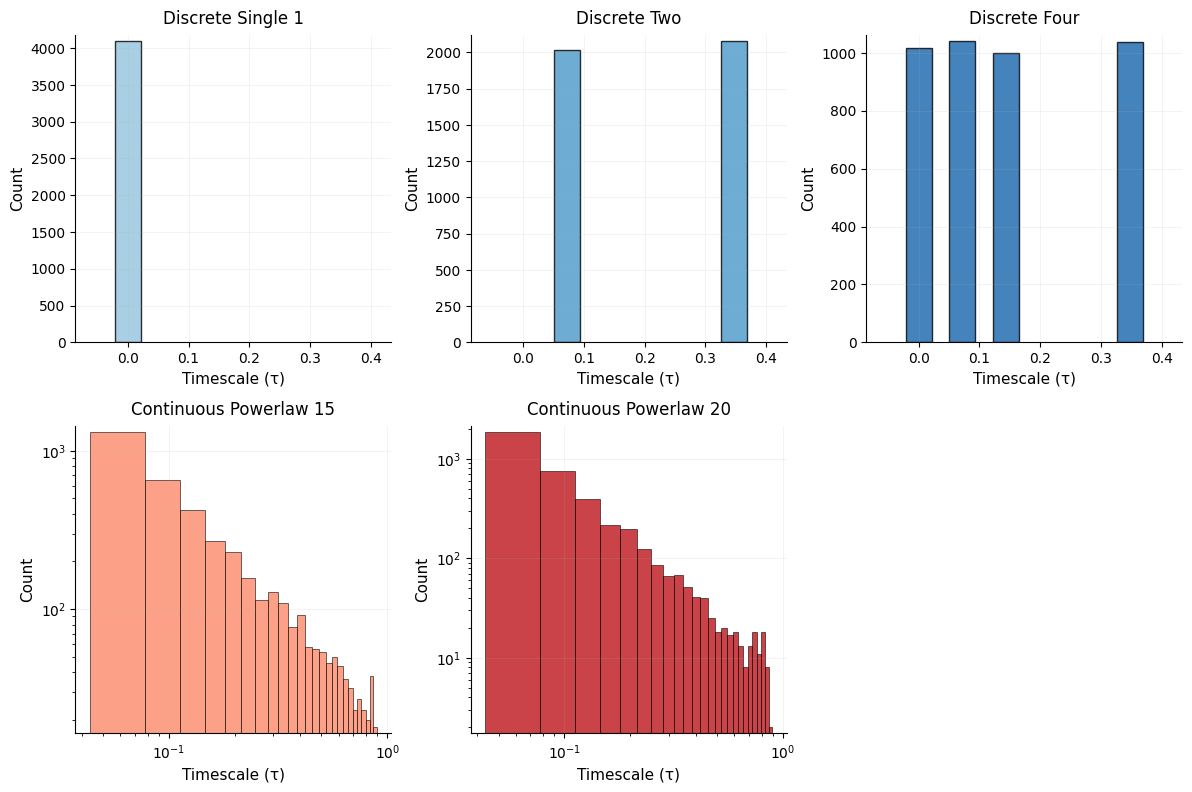

<Figure size 640x480 with 0 Axes>

In [ ]:
# # Regular scale
# fig1 = plot_timescale_distributions(models, figsize=(12, 8), seed=0, log_scale=False)
# plt.show()

# Log scale version
fig2 = plot_timescale_distributions(models, figsize=(12, 8), seed=0, log_scale=True)
plt.show()

plt.savefig(
    "paper_figs/timescale_distributions.pdf",
    dpi=300,
    bbox_inches="tight",
    format="pdf",
)

### Visualize connectivity matrices (heat maps)


=== ABSOLUTE WEIGHTS (SYMLOG) ===
Found 1 discrete timescale groups:
  Group 0: τ=0.0001, 4096 neurons (100.0%)
Found 4 discrete timescale groups:
  Group 0: τ=0.0001, 1016 neurons (24.8%)
  Group 1: τ=0.0721, 1041 neurons (25.4%)
  Group 2: τ=0.1443, 1001 neurons (24.4%)
  Group 3: τ=0.3476, 1038 neurons (25.3%)
Symlog linear threshold: 1.67e-04
Weight ranges: Single [1.13e-41, 1.11e-01], Four [3.42e-43, 1.09e-01]

Timescale groups in four-timescale model:
  Group 0 (τ=0.0001): neurons 0-1015 (1016 neurons)
  Group 1 (τ=0.0721): neurons 1016-2056 (1041 neurons)
  Group 2 (τ=0.1443): neurons 2057-3057 (1001 neurons)
  Group 3 (τ=0.3476): neurons 3058-4095 (1038 neurons)


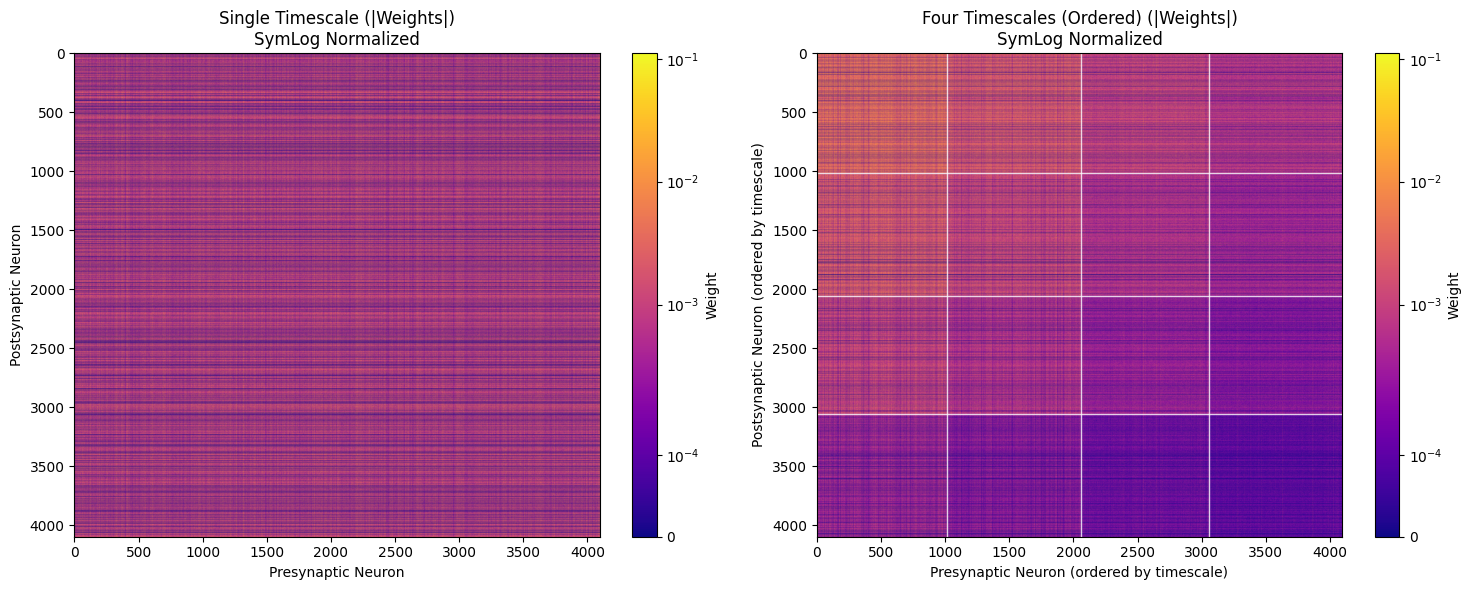

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import SymLogNorm
from pirnns.paper_figs.connectivity.connectivity import get_timescale_groups


def plot_connectivity_heatmaps_symlog(models, figsize=(15, 6), use_absolute=False):
    """
    Plot connectivity matrices with symlog normalization.

    Args:
        use_absolute: If True, show absolute values (magnitude only)
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Single timescale model
    model_single = models["discrete_single_1"][0]["model"]
    (
        W_rec_single,
        timescales_single,
        unique_timescales_single,
        group_assignment_single,
    ) = get_timescale_groups(model_single)

    # Four timescales model
    model_four = models["discrete_four"][0]["model"]
    W_rec_four, timescales_four, unique_timescales_four, group_assignment_four = (
        get_timescale_groups(model_four)
    )

    # For single timescale - no reordering needed
    W_single_ordered = W_rec_single

    # For four timescales - ORDER BY TIMESCALE
    timescale_order = np.argsort(timescales_four)
    W_four_ordered = W_rec_four[timescale_order, :][:, timescale_order]

    # Take absolute value if requested
    if use_absolute:
        W_single_plot = np.abs(W_single_ordered)
        W_four_plot = np.abs(W_four_ordered)
        colormap = "plasma"
        title_suffix = " (|Weights|)"
    else:
        W_single_plot = W_single_ordered
        W_four_plot = W_four_ordered
        colormap = "RdBu_r"
        title_suffix = " (Signed Weights)"

    # Determine symlog parameters
    # Use a threshold that's around the 10th percentile of absolute values
    all_abs_values = np.concatenate(
        [np.abs(W_single_plot.flatten()), np.abs(W_four_plot.flatten())]
    )
    linthresh = np.percentile(all_abs_values[all_abs_values > 0], 30)

    print(f"Symlog linear threshold: {linthresh:.2e}")
    print(
        f"Weight ranges: Single [{W_single_plot.min():.2e}, {W_single_plot.max():.2e}], Four [{W_four_plot.min():.2e}, {W_four_plot.max():.2e}]"
    )

    if use_absolute:
        # For absolute values, use linear normalization below threshold, log above
        vmin, vmax = 0, max(W_single_plot.max(), W_four_plot.max())
        norm = SymLogNorm(linthresh=linthresh, vmin=vmin, vmax=vmax)
    else:
        # For signed values, symmetric around zero
        vmax = max(
            abs(W_single_plot.min()),
            abs(W_single_plot.max()),
            abs(W_four_plot.min()),
            abs(W_four_plot.max()),
        )
        vmin = -vmax
        norm = SymLogNorm(linthresh=linthresh, vmin=vmin, vmax=vmax)

    # Plot single timescale
    im1 = axes[0].imshow(W_single_plot, cmap=colormap, aspect="auto", norm=norm)
    axes[0].set_title(f"Single Timescale{title_suffix}\nSymLog Normalized")
    axes[0].set_xlabel("Presynaptic Neuron")
    axes[0].set_ylabel("Postsynaptic Neuron")
    plt.colorbar(im1, ax=axes[0], label="Weight")

    # Plot four timescales
    im2 = axes[1].imshow(W_four_plot, cmap=colormap, aspect="auto", norm=norm)
    axes[1].set_title(f"Four Timescales (Ordered){title_suffix}\nSymLog Normalized")
    axes[1].set_xlabel("Presynaptic Neuron (ordered by timescale)")
    axes[1].set_ylabel("Postsynaptic Neuron (ordered by timescale)")
    plt.colorbar(im2, ax=axes[1], label="Weight")

    # Add timescale boundaries
    group_boundaries = []
    current_pos = 0
    for ts in unique_timescales_four:
        count = np.sum(timescales_four == ts)
        group_boundaries.append(current_pos + count)
        current_pos += count

    for boundary in group_boundaries[:-1]:
        axes[1].axhline(boundary - 0.5, color="white", linewidth=1, alpha=0.8)
        axes[1].axvline(boundary - 0.5, color="white", linewidth=1, alpha=0.8)

    plt.tight_layout()

    # Print group info
    print("\nTimescale groups in four-timescale model:")
    current_pos = 0
    for i, ts in enumerate(unique_timescales_four):
        count = np.sum(timescales_four == ts)
        end_pos = current_pos + count
        print(
            f"  Group {i} (τ={ts:.4f}): neurons {current_pos}-{end_pos-1} ({count} neurons)"
        )
        current_pos = end_pos

    return fig


# Try both versions with symlog:

# # Signed weights
# print("=== SIGNED WEIGHTS (SYMLOG) ===")
# fig1 = plot_connectivity_heatmaps_symlog(models, use_absolute=False)
# plt.show()

# Absolute weights
print("\n=== ABSOLUTE WEIGHTS (SYMLOG) ===")
fig2 = plot_connectivity_heatmaps_symlog(models, use_absolute=True)
plt.savefig(
    "paper_figs/connectivity/connectivity_heatmaps_symlog.pdf",
    dpi=300,
    bbox_inches="tight",
    format="pdf",
)

plt.show()